In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from backtester import Backtest
from strategy.strategy import Strategy
from strategy.asset import Asset
from strategy.direction import Direction
from datahandler import HistoricalStockData
from statistics.charts import returns_chart

In [3]:
%config InlineBackend.figure_format="retina"
%matplotlib inline

In [4]:
import pandas_datareader.data as web
import datetime

In [5]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 12, 31)

tickers =   ["VOO", "TUR", "RSX", "EWY", "EWS", "VTIP", "TLT", "BWX", "PDBC", "IAU", "VNQI"]
portfolio = [0.1,    0.05,  0.05,  0.05,  0.05,   0.10,  0.20,  0.10,   0.05,  0.15,  0.10, 1]

dfs = []
for ticker in tickers:
    df = web.DataReader(ticker, 'yahoo', start, end).reset_index().rename(columns={'Date': 'date', 'High': 'high', 'Low': 'low', 'Open': 'open', 'Close': 'close', 'Volume': 'volume'})
    df['symbol'] = ticker
    dfs.append(df)


In [6]:
portfolio = pd.concat(dfs)

In [7]:
portfolio = portfolio.sort_values(by='date').reset_index(drop=True)

In [8]:
portfolio.to_csv("data/portfolio.csv", index=False)

In [9]:
data = HistoricalStockData("data/portfolio.csv")
schema = data.schema

In [10]:
data

,date,high,low,open,close,volume,Adj Close,symbol
0,2019-01-02,230.850006,226.020004,226.179993,229.990005,4891300.0,225.350449,VOO
1,2019-01-02,15.333000,14.890000,14.920000,15.120000,1382500.0,14.909319,PDBC
2,2019-01-02,122.160004,121.339996,121.660004,122.150002,19841500.0,119.344078,TLT
3,2019-01-02,47.910000,47.860001,47.860001,47.910000,771400.0,46.986149,VTIP
4,2019-01-02,22.100000,21.850000,21.930000,22.100000,876200.0,21.076557,EWS
...,...,...,...,...,...,...,...,...
2767,2019-12-31,27.180000,27.000000,27.110001,27.090000,132900.0,27.090000,TUR
2768,2019-12-31,16.650000,16.510000,16.520000,16.559999,1780800.0,16.559999,PDBC
2769,2019-12-31,295.989990,294.170013,294.529999,295.799988,2512700.0,295.799988,VOO
2770,2019-12-31,136.460007,135.380005,136.210007,135.479996,10707400.0,135.479996,TLT


In [11]:
strat = Strategy()

In [12]:
asset_1 = Asset('VOO', 0.1)
asset_2 = Asset('TUR', 0.05)
asset_3 = Asset('RSX', 0.05)
asset_4 = Asset('EWY', 0.05)
asset_5 = Asset('EWS', 0.05)
asset_6 = Asset('VTIP', 0.10)
asset_7 = Asset('TLT', 0.20)
asset_8 = Asset('BWX', 0.10)
asset_9 = Asset('PDBC', 0.05)
asset_10 = Asset('IAU', 0.15)
asset_11 = Asset('VNQI', 0.10)

In [13]:
strat.add_assets([
    asset_1, asset_2, asset_3, asset_4, asset_5, asset_6, asset_7, asset_8,
    asset_9, asset_10, asset_11
])

In [14]:
bt = Backtest(schema)
bt.strategy = strat
bt.data = data
bt.stop_if_broke = False

In [15]:
bt.run(initial_capital=1_000_000)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:04


,capital,cash,total_value,% change,accumulated return
2019-01-01,1.000000e+06,1000000.000000,NaN,NaN,NaN
2019-01-02,1.000000e+06,403.112655,9.995969e+05,0.000000,1.000000
2019-01-03,9.987008e+05,403.112655,9.982976e+05,-0.001299,0.998701
2019-01-04,1.008706e+06,403.112655,1.008302e+06,0.010018,1.008706
2019-01-07,1.010929e+06,403.112655,1.010526e+06,0.002205,1.010929
...,...,...,...,...,...
2019-12-24,1.161007e+06,447.309637,1.160560e+06,0.002650,1.161007
2019-12-26,1.166209e+06,447.309637,1.165761e+06,0.004480,1.166209
2019-12-27,1.168988e+06,447.309637,1.168541e+06,0.002383,1.168988
2019-12-30,1.166540e+06,447.309637,1.166092e+06,-0.002094,1.166540


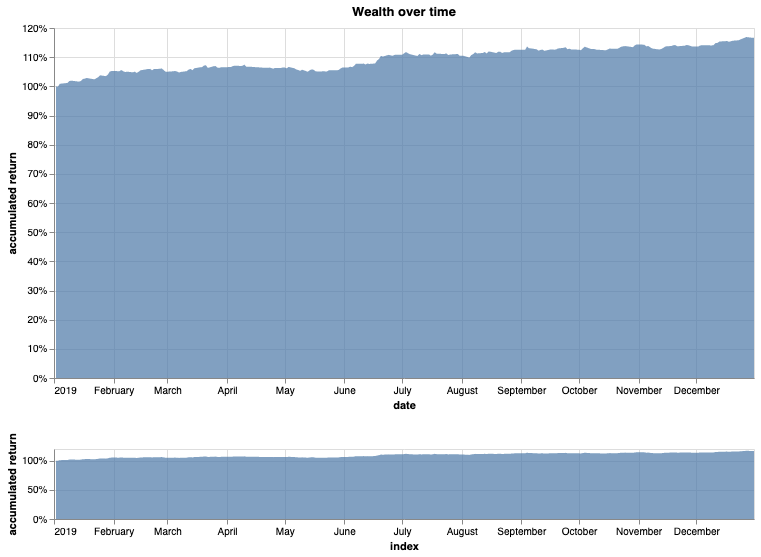

In [ ]:
returns_chart(bt.balance)